# Train network on data from CSV file

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from data.square_dataset import CSVDataset
from torch.utils.data import DataLoader

## Loading the data

In this section we want to load data from the CSV file you can find in the 'data/square.csv' file.

In [2]:
# TODO Create an instance of the CSVDataset class
dataset = CSVDataset(filename="./data/square.csv")

In [3]:
# TODO Get the first item of the dataset
dataset[0]

(-5.0, 26.379838533159536)

In [4]:
# TODO print the length of the dataset
len(dataset)

1000

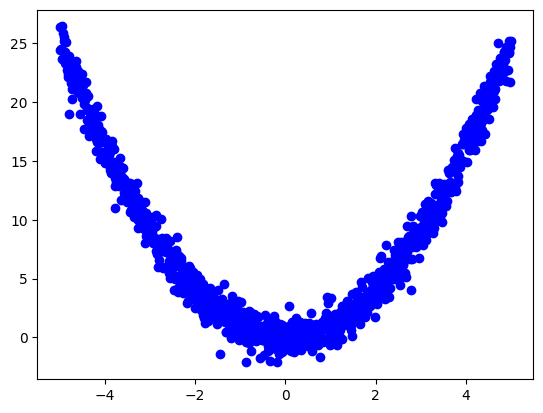

In [5]:
# TODO plot the datapoint in the dataset by iterating over the data
for i in range(len(dataset)):
    plt.scatter(dataset[i][0], dataset[i][1], color="blue")

## Dataloader

In [6]:
# TODO Create a data loader for the CSV dataset
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

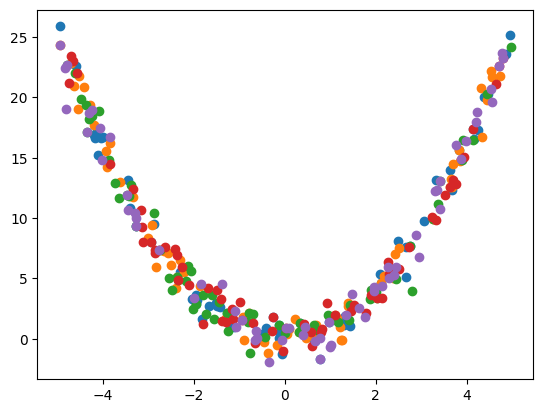

In [7]:
# TODO Draw five batches from the dataloader and plot them using matplotlib
for i in range(5):
    X, Y = next(iter(dataloader))
    plt.scatter(X, Y)

In [8]:
# We need to reshape the data into a two-dimensional array.
# The reshaped data will be of shape (batch_size, data_dimension)
# Moreover we need to change the data pyte to torch.float32 which we can do with the to() method
X = X.reshape(-1, 1).to(torch.float32)
X.shape

torch.Size([64, 1])

## Define a neural network

In [9]:
class FunctionApproximationNet(nn.Module):
    """
    This is our neural network. It consists of two layers: a hidden layer and a final output layer.
    """
    def __init__(self):
        """
        Here we initialize the layers of the neural network
        """
        super(FunctionApproximationNet, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        """
        This function runs a data point through the network.
        :param x: data array of shape (batch_size, data_dimension)
        :return: output of the network of shape (batch_size, output_dimension)
        """
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [10]:
# TODO Create an instance of the neural network
net = FunctionApproximationNet()

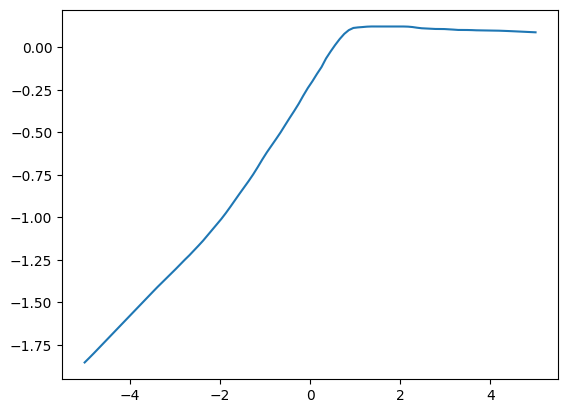

In [11]:
# Run X_test data point through the network
X_test = torch.tensor(np.linspace(-5, 5, 100).reshape(-1, 1)).to(torch.float32)

with torch.no_grad():
    Y_hat = net(X_test)
    
plt.plot(X_test[:, 0], Y_hat[:, 0])

In [12]:
num_epochs = int(1e3)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(num_epochs):
    # Draw data from the data loader
    X, Y = next(iter(dataloader))
    
    # Forward pass
    outputs = net(X.reshape(-1, 1).to(torch.float32))
    loss = criterion(outputs, Y.reshape(-1, 1).to(torch.float32))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\autograd\__init__.py:200: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [100/1000], Loss: 2.4433
Epoch [200/1000], Loss: 2.1325
Epoch [300/1000], Loss: 2.3461
Epoch [400/1000], Loss: 1.5024
Epoch [500/1000], Loss: 1.3241
Epoch [600/1000], Loss: 1.1117
Epoch [700/1000], Loss: 1.7805
Epoch [800/1000], Loss: 1.1084
Epoch [900/1000], Loss: 1.5231
Epoch [1000/1000], Loss: 1.3301


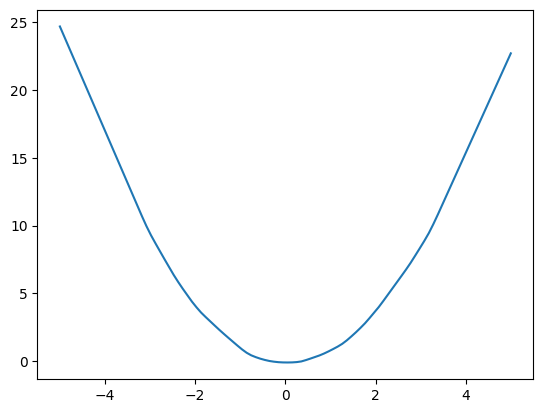

In [13]:
# Run X_test data point through the network
X_test = torch.tensor(np.linspace(-5, 5, 100).reshape(-1, 1)).to(torch.float32)

with torch.no_grad():
    Y_hat = net(X_test)
    
plt.plot(X_test[:, 0], Y_hat[:, 0])